In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

## Load Needed Datasets:

In [3]:
df_AW = pd.read_csv('award_winners.csv')

In [4]:
df_goals = pd.read_csv('goals.csv')

In [5]:
df_TA = pd.read_csv('team_appearances.csv')

In [6]:
df_TS = pd.read_csv('tournament_standings.csv')

## Examine/Parse Each Dataset:

Award Winners:

In [7]:
df_AW.head()

,key_id,tournament_id,tournament_name,award_id,award_name,shared,player_id,family_name,given_name,team_id,team_name,team_code
0,1,WC-1930,1930 FIFA World Cup,A-4,Golden Boot,0,P-01708,Stábile,Guillermo,T-03,Argentina,ARG
1,2,WC-1930,1930 FIFA World Cup,A-5,Silver Boot,0,P-06624,Cea,Pedro,T-81,Uruguay,URY
2,3,WC-1930,1930 FIFA World Cup,A-6,Bronze Boot,0,P-08936,Patenaude,Bert,T-80,United States,USA
3,4,WC-1934,1934 FIFA World Cup,A-4,Golden Boot,0,P-03976,Nejedlý,Oldřich,T-20,Czechoslovakia,CSK
4,5,WC-1934,1934 FIFA World Cup,A-5,Silver Boot,1,P-08398,Conen,Edmund,T-29,Germany,DEU


Total number of awards each country/team has recieved per tournament:

In [8]:
df_AW = df_AW.groupby(['tournament_id','team_name']).agg({'award_id':'count'})
df_AW.head()

award_id
tournament_id team_name               
WC-1930       Argentina              1
              United States          1
              Uruguay                1
WC-1934       Czechoslovakia         1
              Germany                1

Goals:

In [9]:
df_goals.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-08962,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-00280,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09030,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,Mexico,MEX,0,1,P-00780,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09030,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0


Total number of goals scored by each team per every tournament:

In [10]:
df_goals = df_goals.groupby(['tournament_id','team_name']).agg({'goal_id':'count'})
df_goals.head()

goal_id
tournament_id team_name         
WC-1930       Argentina       18
              Brazil           5
              Chile            5
              France           4
              Mexico           4

Team Appearances:

In [11]:
df_TA.head()

,key_id,tournament_id,tournament_name,match_id,match_name,stage_name,group_name,group_stage,knockout_stage,replayed,replay,match_date,match_time,stadium_id,stadium_name,city_name,country_name,team_id,team_name,team_code,opponent_id,opponent_name,opponent_code,home_team,away_team,goals_for,goals_against,goal_differential,extra_time,penalty_shootout,penalties_for,penalties_against,result,win,lose,draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,0,1930-07-13,15:00,S-193,Estadio Pocitos,Montevideo,Uruguay,T-28,France,FRA,T-44,Mexico,MEX,1,0,4,1,3,0,0,0,0,win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,0,1930-07-13,15:00,S-193,Estadio Pocitos,Montevideo,Uruguay,T-44,Mexico,MEX,T-28,France,FRA,0,1,1,4,-3,0,0,0,0,lose,0,1,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,0,1930-07-13,15:00,S-192,Estadio Gran Parque Central,Montevideo,Uruguay,T-80,United States,USA,T-06,Belgium,BEL,1,0,3,0,3,0,0,0,0,win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,0,1930-07-13,15:00,S-192,Estadio Gran Parque Central,Montevideo,Uruguay,T-06,Belgium,BEL,T-80,United States,USA,0,1,0,3,-3,0,0,0,0,lose,0,1,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,0,1930-07-14,12:45,S-192,Estadio Gran Parque Central,Montevideo,Uruguay,T-84,Yugoslavia,YUG,T-09,Brazil,BRA,1,0,2,1,1,0,0,0,0,win,1,0,0


Total number of wins each team had per each tournament:

In [12]:
df_TA = df_TA.groupby(['tournament_id','team_name']).agg({'win':'sum'})
df_TA.head(20)

win
tournament_id team_name          
WC-1930       Argentina         4
              Belgium           0
              Bolivia           0
              Brazil            1
              Chile             2
              France            1
              Mexico            0
              Paraguay          1
              Peru              0
              Romania           1
              United States     2
              Uruguay           4
              Yugoslavia        2
WC-1934       Argentina         0
              Austria           2
              Belgium           0
              Brazil            0
              Czechoslovakia    3
              Egypt             0
              France            0

Tournament Standings:

In [13]:
df_TS.head()

,key_id,tournament_id,tournament_name,position,team_id,team_name,team_code
0,1,WC-1930,1930 FIFA World Cup,1,T-81,Uruguay,URY
1,2,WC-1930,1930 FIFA World Cup,2,T-03,Argentina,ARG
2,3,WC-1930,1930 FIFA World Cup,3,T-80,United States,USA
3,4,WC-1930,1930 FIFA World Cup,4,T-84,Yugoslavia,YUG
4,5,WC-1934,1934 FIFA World Cup,1,T-39,Italy,ITA


Each teams final rank in every tourament (only top 4 showed) and each winner for every tournament: 

In [14]:
df_TS['winner'] = np.where(df_TS['position'] == 1, 1, 0)

df_TS = df_TS[['tournament_id', 'team_name', 'position', 'winner']]

df_TS = df_TS.groupby(['tournament_id','team_name']).agg({'position':'sum', 'winner':'sum'})
df_TS.head()

position  winner
tournament_id team_name                      
WC-1930       Argentina             2       0
              United States         3       0
              Uruguay               1       1
              Yugoslavia            4       0
WC-1934       Austria               4       0

Note: For winner I encoded a 1 for the team that won the tournament and 0 otherwise.

## Merge Datasets into One:

In [15]:
dfs = [df_TA, df_goals, df_AW, df_TS]

df = reduce(lambda  left,right: pd.merge(left,right,on=['tournament_id', 'team_name'],
                                            how='outer'), dfs)

df.head(20)

win  goal_id  award_id  position  winner
tournament_id team_name                                               
WC-1930       Argentina         4     18.0       1.0       2.0     0.0
              Belgium           0      NaN       NaN       NaN     NaN
              Bolivia           0      NaN       NaN       NaN     NaN
              Brazil            1      5.0       NaN       NaN     NaN
              Chile             2      5.0       NaN       NaN     NaN
              France            1      4.0       NaN       NaN     NaN
              Mexico            0      4.0       NaN       NaN     NaN
              Paraguay          1      1.0       NaN       NaN     NaN
              Peru              0      1.0       NaN       NaN     NaN
              Romania           1      3.0       NaN       NaN     NaN
              United States     2      7.0       1.0       3.0     0.0
              Uruguay           4     15.0       1.0       1.0     1.0
              Yugoslavia        2      7.0       NaN       4.0     0.0
WC-1934       Argentina         0      2.0       NaN       NaN     NaN
              Austria           2      7.0       NaN       4.0     0.0
              Belgium           0      2.0       NaN       NaN     NaN
              Brazil            0      1.0       NaN       NaN     NaN
              Czechoslovakia    3      9.0       1.0       2.0     0.0
              Egypt             0      2.0       NaN       NaN     NaN
              France            0      2.0       NaN       NaN     NaN

Rename columns for clarity:

In [16]:
df = df.rename(columns={'win':'total_wins', 'goal_id':'total_goals', 'award_id':'total_player_awards', 'position':'final_rank'})

df.head()

total_wins  total_goals  total_player_awards  \
tournament_id team_name                                                 
WC-1930       Argentina           4         18.0                  1.0   
              Belgium             0          NaN                  NaN   
              Bolivia             0          NaN                  NaN   
              Brazil              1          5.0                  NaN   
              Chile               2          5.0                  NaN   

                         final_rank  winner  
tournament_id team_name                      
WC-1930       Argentina         2.0     0.0  
              Belgium           NaN     NaN  
              Bolivia           NaN     NaN  
              Brazil            NaN     NaN  
              Chile             NaN     NaN

Since many columns contain null values I will replace them all with zeros. For total goals, 0 will indicate 0 goals scored. For total player awards, 0 will indicate no player awards were recieved by that team. For final rank, 0 will indicate that the team didn't rank in the top 4 of said tournament. Lastly, as I mentioned above, for winner, 0 will indicate that said team did not win the tournament.

In [17]:
df = df.fillna(0)
df.head(20)

total_wins  total_goals  total_player_awards  \
tournament_id team_name                                                      
WC-1930       Argentina                4         18.0                  1.0   
              Belgium                  0          0.0                  0.0   
              Bolivia                  0          0.0                  0.0   
              Brazil                   1          5.0                  0.0   
              Chile                    2          5.0                  0.0   
              France                   1          4.0                  0.0   
              Mexico                   0          4.0                  0.0   
              Paraguay                 1          1.0                  0.0   
              Peru                     0          1.0                  0.0   
              Romania                  1          3.0                  0.0   
              United States            2          7.0                  1.0   
              Uruguay                  4         15.0                  1.0   
              Yugoslavia               2          7.0                  0.0   
WC-1934       Argentina                0          2.0                  0.0   
              Austria                  2          7.0                  0.0   
              Belgium                  0          2.0                  0.0   
              Brazil                   0          1.0                  0.0   
              Czechoslovakia           3          9.0                  1.0   
              Egypt                    0          2.0                  0.0   
              France                   0          2.0                  0.0   

                              final_rank  winner  
tournament_id team_name                           
WC-1930       Argentina              2.0     0.0  
              Belgium                0.0     0.0  
              Bolivia                0.0     0.0  
              Brazil                 0.0     0.0  
              Chile                  0.0     0.0  
              France                 0.0     0.0  
              Mexico                 0.0     0.0  
              Paraguay               0.0     0.0  
              Peru                   0.0     0.0  
              Romania                0.0     0.0  
              United States          3.0     0.0  
              Uruguay                1.0     1.0  
              Yugoslavia             4.0     0.0  
WC-1934       Argentina              0.0     0.0  
              Austria                4.0     0.0  
              Belgium                0.0     0.0  
              Brazil                 0.0     0.0  
              Czechoslovakia         2.0     0.0  
              Egypt                  0.0     0.0  
              France                 0.0     0.0

## Descriptive Statistics for Features:

The mean of all features for each country across all World Cup tournaments:

In [18]:
df.groupby(['team_name']).agg({'total_wins':'mean', 'total_goals':'mean', 'total_player_awards':'mean', 'final_rank':'mean', 'winner':'mean'})

,total_wins,total_goals,total_player_awards,final_rank,winner
team_name,,,,,
Algeria,0.750000,3.250000,0.000000,0.000000,0.000000
Angola,0.000000,1.000000,0.000000,0.000000,0.000000
Argentina,2.944444,8.444444,0.722222,0.500000,0.166667
Australia,0.666667,2.833333,0.000000,0.000000,0.000000
Austria,1.714286,6.142857,0.142857,1.000000,0.000000
...,...,...,...,...,...
Uruguay,1.857143,6.357143,0.285714,1.000000,0.142857
Wales,0.500000,2.500000,0.000000,0.000000,0.000000
West Germany,3.900000,13.100000,1.000000,1.600000,0.300000


The median values of all features for each country across all tournaments:

In [19]:
df.groupby(['team_name']).agg({'total_wins':'median', 'total_goals':'median', 'total_player_awards':'median', 'final_rank':'median', 'winner':'median'})

,total_wins,total_goals,total_player_awards,final_rank,winner
team_name,,,,,
Algeria,0.5,3.0,0.0,0.0,0.0
Angola,0.0,1.0,0.0,0.0,0.0
Argentina,2.5,8.0,0.0,0.0,0.0
Australia,0.5,3.0,0.0,0.0,0.0
Austria,2.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...
Uruguay,1.5,4.0,0.0,0.0,0.0
Wales,0.5,2.5,0.0,0.0,0.0
West Germany,4.0,12.5,1.0,1.5,0.0


The standard deviation of all features for each country across all tournaments:

In [20]:
df.groupby(['team_name']).agg({'total_wins':'std', 'total_goals':'std', 'total_player_awards':'std', 'final_rank':'std', 'winner':'std'})

,total_wins,total_goals,total_player_awards,final_rank,winner
team_name,,,,,
Algeria,0.957427,3.304038,0.000000,0.000000,0.000000
Angola,NaN,NaN,NaN,NaN,NaN
Argentina,1.984416,4.816909,1.074055,0.785905,0.383482
Australia,0.816497,1.722401,0.000000,0.000000,0.000000
Austria,1.496026,5.241774,0.377964,1.732051,0.000000
...,...,...,...,...,...
Uruguay,1.511858,5.485746,0.611250,1.664101,0.363137
Wales,0.707107,2.121320,0.000000,0.000000,0.000000
West Germany,1.728840,5.626327,0.942809,1.264911,0.483046


The variance of all features for each country across all tournaments:

In [21]:
df.groupby(['team_name']).agg({'total_wins':'var', 'total_goals':'var', 'total_player_awards':'var', 'final_rank':'var', 'winner':'var'})

,total_wins,total_goals,total_player_awards,final_rank,winner
team_name,,,,,
Algeria,0.916667,10.916667,0.000000,0.000000,0.000000
Angola,NaN,NaN,NaN,NaN,NaN
Argentina,3.937908,23.202614,1.153595,0.617647,0.147059
Australia,0.666667,2.966667,0.000000,0.000000,0.000000
Austria,2.238095,27.476190,0.142857,3.000000,0.000000
...,...,...,...,...,...
Uruguay,2.285714,30.093407,0.373626,2.769231,0.131868
Wales,0.500000,4.500000,0.000000,0.000000,0.000000
West Germany,2.988889,31.655556,0.888889,1.600000,0.233333


## Check for Missing Values:

In [22]:
df.isnull().sum()

total_wins             0
total_goals            0
total_player_awards    0
final_rank             0
winner                 0
dtype: int64

As expected no missing values since I already converted the nulls to zeros.

## Check for Outliers:

<AxesSubplot:>

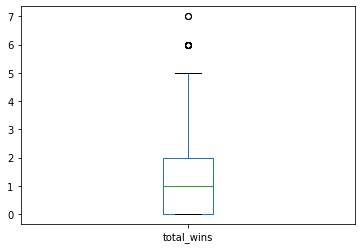

In [23]:
df['total_wins'].plot.box()

There appears to be 2 outliers in total wins but this is due to the fact that the one team who wins each tournament gets more wins than all the other teams who competed. Therefore, I will not be dropping outliers in this column.

<AxesSubplot:>

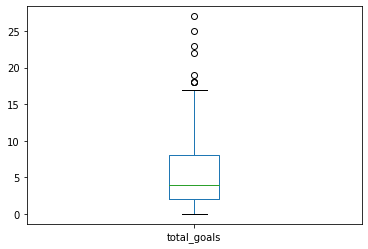

In [24]:
df['total_goals'].plot.box()

We do have outliers in total goals, however after examining the dataset where the outliers lie and doing some fact checking, these values are indeed correct and will not be dropped.

<AxesSubplot:>

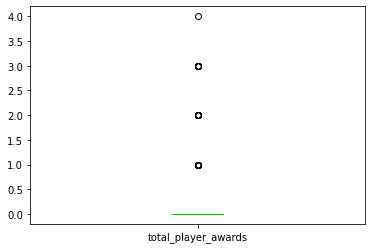

In [25]:
df['total_player_awards'].plot.box()

We do have outliers in total player awards but this is due to the fact that the majority of teams, especially those who do not make it to the final 4, generally do not recieve any player awards for their respective teams. While the teams who reach the end recieve the majority of these player awards. Due to this no data in this column will be dropped.

<AxesSubplot:>

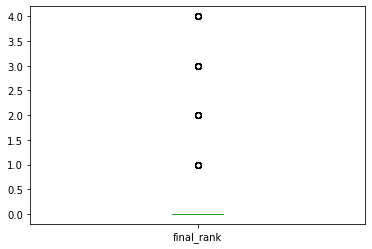

In [26]:
df['final_rank'].plot.box()

Again, we have outliers in final rank, and just like I said above this is due to the fact that only 4 teams per tournament are ranked and the rest are not. Therefore, this data will also be retained.

<AxesSubplot:>

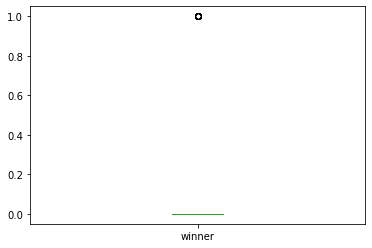

In [27]:
df['winner'].plot.box()

The outlier in this case is winning the competition, and as we know only one team wins per tournament while all the others lose (0 in this case). This creates the fact that there is an outlier at 1, but we know this data is necessary and it will be retained.

## Selecting Approaches:

For this project I will be attempting two different machine learning models to see which one gives the best results/performance. Based on the fact that I have labeled data and that the output of my model is a class/label, I have determined a classification model will suit best. That being said for this project I will be using the Random Forest algorithm and an SVM algorithm. I chose Random Forest because I was drawn to its predictive capabilities and the fact that it makes use of multiple decision trees to get the best result. I selected SVM because it isn't sensitive to outliers and my data has fairly clear margins of separation.

## Preprocessing Data:

### Examining Scales:

<AxesSubplot:ylabel='Density'>

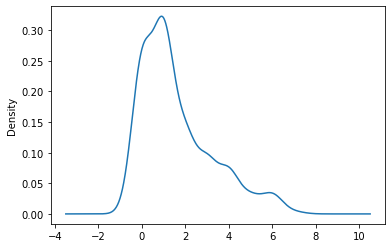

In [28]:
df['total_wins'].plot.density()

<AxesSubplot:ylabel='Density'>

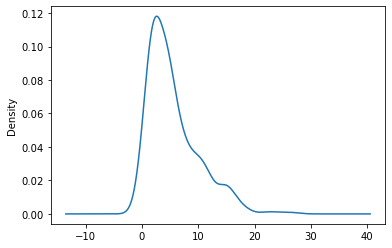

In [29]:
df['total_goals'].plot.density()

<AxesSubplot:ylabel='Density'>

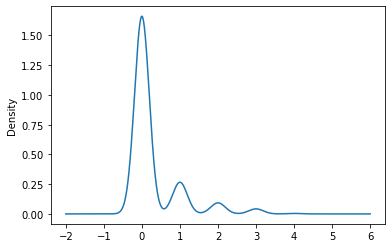

In [30]:
df['total_player_awards'].plot.density()

<AxesSubplot:ylabel='Density'>

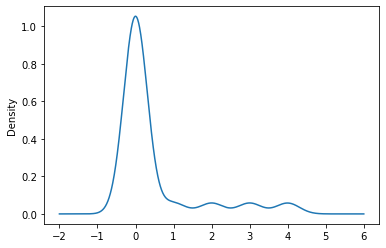

In [31]:
df['final_rank'].plot.density()

<AxesSubplot:ylabel='Density'>

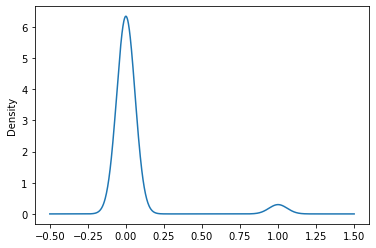

In [32]:
df['winner'].plot.density()

Due to the fact that I am implementing an SVM algorithm I will be scaling this data down to a common scale. Scaling is crucial for this algorithm due to the fact that it considers the distance between observations. As for Random Forest it is not a distance based model, it instead is based on partitioning data to make predictions, therefore it makes no difference using the scaled or unscaled data.

In [33]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled,
                        columns = df.columns)

df_scaled.head()

,total_wins,total_goals,total_player_awards,final_rank,winner
0,1.460388,2.748405,1.069924,1.447187,-0.217047
1,-0.978996,-1.229145,-0.433504,-0.420028,-0.217047
2,-0.978996,-1.229145,-0.433504,-0.420028,-0.217047
3,-0.369150,-0.124270,-0.433504,-0.420028,-0.217047
4,0.240696,-0.124270,-0.433504,-0.420028,-0.217047


### Transforming Data:

In tree based algorithms such as Random Forest they do not assume normal distribtion among the predictors therefore, the dataset for Random Forest will not be transformed. SVM algorithms also do not assume normality and as my data is not horribly skewed I will not be performing any log, sqrt, etc. transformations to the data.

## Training and Test Data:

In [34]:
# define X and y
X = df_scaled[['total_wins', 'total_goals', 'total_player_awards', 'final_rank']]

y = df_scaled['winner']

In [36]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [37]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Discretization of Data:

While the Random Forest Model could work with continuous variables it is not the  most suitable in the case of classification problems. Therefore, I will be using the discreization technique to alter my features.

Credit to:
https://www.kaggle.com/code/mrbisht/discretization-continuous-variables

In [38]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [39]:
from feature_engine.discretisation import EqualWidthDiscretiser

totalWinsDiscretiser=EqualWidthDiscretiser(bins=4,variables=["total_wins"])
totalGoalsDiscretiser=EqualWidthDiscretiser(bins=5,variables=["total_goals"])
totalPlayerAwardsDiscretiser=EqualWidthDiscretiser(bins=3,variables=["total_player_awards"])
finalRankDiscretiser=EqualWidthDiscretiser(bins=4,variables=["final_rank"])


In [40]:
totalWinsDiscretiser.fit(X_train_copy)
totalGoalsDiscretiser.fit(X_train_copy)
totalPlayerAwardsDiscretiser.fit(X_train_copy)
finalRankDiscretiser.fit(X_train_copy)

EqualWidthDiscretiser(bins=4, variables=['final_rank'])

In [41]:
X_train_copy=totalWinsDiscretiser.transform(X_train_copy)
X_test_copy=totalWinsDiscretiser.transform(X_test_copy)

X_train_copy=totalGoalsDiscretiser.transform(X_train_copy)
X_test_copy=totalGoalsDiscretiser.transform(X_test_copy)

X_train_copy=totalPlayerAwardsDiscretiser.transform(X_train_copy)
X_test_copy=totalPlayerAwardsDiscretiser.transform(X_test_copy)

X_train_copy=finalRankDiscretiser.transform(X_train_copy)
X_test_copy=finalRankDiscretiser.transform(X_test_copy)


X_test_copy.head()

,total_wins,total_goals,total_player_awards,final_rank
457,3,2,2,1
107,0,0,0,0
165,0,0,0,0
197,0,0,0,0
446,0,1,0,0


## Evaluating Models:

### SVM Model:

Accuracy Score: 0.9795918367346939
AUC Score: 0.8946236559139785

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.80      0.80      0.80         5

    accuracy                           0.98        98
   macro avg       0.89      0.89      0.89        98
weighted avg       0.98      0.98      0.98        98



Confusion Matrix:


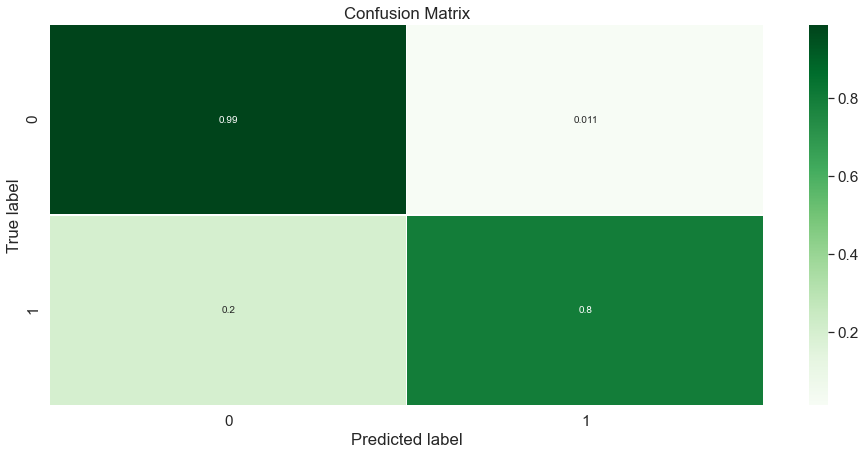

In [46]:
from sklearn import svm

# instantiate model
svm_linear_model = svm.SVC(kernel='linear') 

# fit model
svm_linear_model.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = svm_linear_model.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
print()
print('Classification Report:')
print(classification_report(y_test, y_pred_class))

print()
print()
print('Confusion Matrix:')
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_class)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Model:

Accuracy Score: 0.9693877551020408
AUC Score: 0.7946236559139785

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.75      0.60      0.67         5

    accuracy                           0.97        98
   macro avg       0.86      0.79      0.83        98
weighted avg       0.97      0.97      0.97        98



Confusion Matrix:


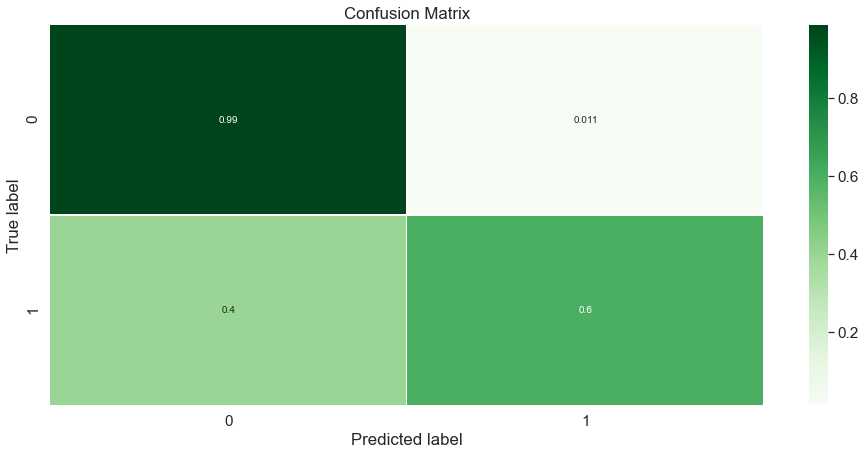

In [47]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_copy, y_train);

# Use the forest's predict method on the test data
y_pred_class = rf.predict(X_test_copy)
#print(y_pred_class)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
print()
print('Classification Report:')
print(classification_report(y_test, y_pred_class))

print()
print()
print('Confusion Matrix:')
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_class)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix credit to:
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56